# Question - 2

In [50]:
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plot
import random
from mpl_toolkits import mplot3d
import matplotlib.axes as axes

### Generating The datasets

In [51]:
def rosenborck_function(x, y):
    return x**2 + 100*((y-x**2)**2)

def generate_points(n, t):
    '''
    We shall use this function to generate the points with random initialisation 
    as mentioned in the question. We shall take the points from the range ...
    [-10, 10]^2
    x is the 1st argument
    y is the 2nd argument
    '''
    training_set_x = []
    training_set_y = []
    for i in range(n):
        training_set_x += [[random.uniform(-t, t), random.uniform(-t, t)]]
        training_set_y += [rosenborck_function(training_set_x[i][0], training_set_x[i][1])]
    training_set_y = np.array(training_set_y)
    training_set_x = np.array(training_set_x)
    return training_set_x, training_set_y
training_set_x, training_set_y = generate_points(500, 0.5)

In [52]:
pd.DataFrame(training_set_y)

,0
0,0.394607
1,18.223136
2,1.544775
3,0.244966
4,23.444393
...,...
495,1.821986
496,11.703695
497,1.061179
498,20.140019


In [53]:
pd.DataFrame(training_set_x)

,0,1
0,0.265903,0.013792
1,0.145532,-0.405458
2,0.282326,0.200748
3,-0.342303,0.152920
4,0.229998,-0.430748
...,...,...
495,-0.485617,0.109881
496,0.397290,-0.181953
497,0.216040,0.147396
498,-0.101772,-0.438303


In [54]:
def plot_points(training_set_x, training_set_y):
    # fig = plot.figure()
    # ax = plot.axes(projection = '3d', )
    # ax.scatter3D([i[0] for i in training_set_x], [i[1] for i in training_set_x], training_set_y, color = 'black')
    z = []
    for i in range(len(training_set_x)):
        for j in range(len(training_set_x)):
            temp_dict = dict()
            temp_dict['x'] = training_set_x[i][0]
            temp_dict['y'] = training_set_x[j][1]
            temp_dict['function'] = rosenborck_function(training_set_x[i][0], training_set_x[j][1])
            z += [temp_dict]
    return z
temp = pd.DataFrame(plot_points(training_set_x, training_set_y))
temp

,x,y,function
0,0.265903,0.013792,0.394607
1,0.265903,-0.405458,22.743789
2,0.265903,0.200748,1.761837
3,0.265903,0.152920,0.746637
4,0.265903,-0.430748,25.216220
...,...,...,...
249995,-0.001185,0.109881,1.207349
249996,-0.001185,-0.181953,3.310740
249997,-0.001185,0.147396,2.172515
249998,-0.001185,-0.438303,19.211110


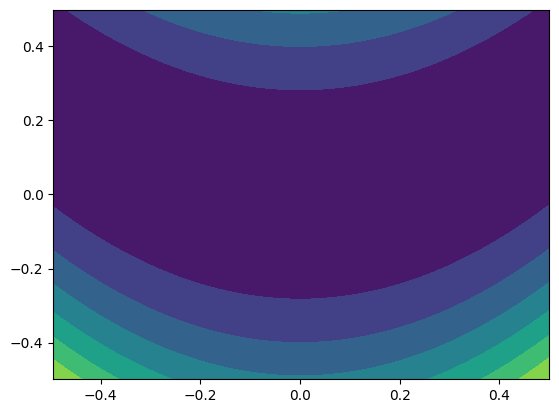

In [55]:
fig = plot.figure()
# ax = plot.axes(projection='3d',)
plot.tricontourf(list(temp['x']), list(temp['y']), list(temp['function']))
# plot.savefig('./data.png')
plot.show()

In [81]:
def gradient_value(parameters):
    '''
    This function shall give the gradient of the rosenborck function
    '''
    x = parameters[0]
    y = parameters[1]
    return np.array([2*x - 400*x*(y - x**2), 200*(y - x**2)]).astype(np.float64)
def gradient_descent(w_now, x_set, y_set, data_points, learning_rate, tolerence):
    gradient = np.array([0.0]*len(w_now))
    w_new = np.array([0.0]*len(w_now))
    for i in range(data_points):
        x = x_set[i]
        y = y_set[i]
        gradient += gradient_value(x)
    gradient /= data_points
    epochs = i+1
    loss = sum([rosenborck_function(i[0], i[1]) for i in x_set])/data_points
    w_new = w_now - learning_rate*gradient
    if(loss < tolerence):
        print("Epochs: ", epochs)
        print("Loss: ", loss)
        return w_new, 0
        # it means that we don't have to continue 
    return w_new, 1





In [82]:
w_init = np.array([10, 100])
epochs = 1000

w_new = gradient_descent(w_init, training_set_x, training_set_y, 500 ,0.001, 0.001)
for i in range(epochs):
    w_new, cont = gradient_descent(w_new, training_set_x, training_set_y, 500, 0.001, 0.001)
    print(w_new)
    if(not cont):
        break
print(w_new)

/var/folders/13/_wyhp36n6jgdfcwhj2x6mm940000gn/T/ipykernel_12018/1316084909.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w_new = w_now - learning_rate*gradient


[array([ 10.00266165, 100.01753427]) 1.0162034402586306]
[array([ 10.00399248, 100.01886509]) 1.0324068805172613]
[array([ 10.0053233 , 100.02019592]) 1.048610320775892]
[array([ 10.00665413, 100.02152674]) 1.0648137610345225]
[array([ 10.00798495, 100.02285757]) 1.0810172012931532]
[array([ 10.00931578, 100.02418839]) 1.0972206415517838]
[array([ 10.0106466 , 100.02551922]) 1.1134240818104144]
[array([ 10.01197743, 100.02685004]) 1.129627522069045]
[array([ 10.01330826, 100.02818087]) 1.1458309623276757]
[array([ 10.01463908, 100.0295117 ]) 1.1620344025863063]
[array([ 10.01596991, 100.03084252]) 1.178237842844937]
[array([ 10.01730073, 100.03217335]) 1.1944412831035676]
[array([ 10.01863156, 100.03350417]) 1.2106447233621982]
[array([ 10.01996238, 100.034835  ]) 1.2268481636208288]
[array([ 10.02129321, 100.03616582]) 1.2430516038794595]
[array([ 10.02262403, 100.03749665]) 1.25925504413809]
[array([ 10.02395486, 100.03882747]) 1.2754584843967207]
[array([ 10.02528568, 100.0401583 ])